# Baselines

Baseline Method Repositories:

- https://github.com/xunzheng/notears
- https://github.com/fishmoon1234/DAG-GNN
- https://github.com/huawei-noah/trustworthyAI
- https://github.com/kurowasan/GraN-DAG
  - use this: https://github.com/lihebi/GraN-DAG-nodata
  - the paper: [Gradient-Based Neural DAG Learning](https://openreview.net/forum?id=rklbKA4YDS)

TODOs:
- [ ] which uses GPU and which does not
- [ ] use covariate matrix
- [ ] RL-BIC hyper-parameters


In [1]:
1+2

3

# Setup

Python libraries:

```
pip install -r requirements.txt
```

Download some repos

```
git clone https://github.com/xunzheng/notears
git clone https://github.com/fishmoon1234/DAG-GNN
# This is repo is broken, too large to clone
git clone https://github.com/kurowasan/GraN-DAG
git clone https://github.com/huawei-noah/trustworthyAI
```


In [ ]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 9.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 570 kB/s eta 0:00:01
     |████████████████████████████████| 748.8 MB 57 kB/s  eta 0:00:016
     |████████████████████████████████| 6.8 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 918 kB 996 kB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 872 kB/s eta 0:00:01
     |████████████████████████████████| 510 kB 998 kB/s eta 0:00:01
Processing /home/jovyan/.cache/pip/wheels/1b/3e/31/72653079400d50aff1c3492982a6965994629072cad3b97720/future-0.18.2-py3-none-any.whl
     |████████████████████████████████| 301 kB 1.0 MB/s eta 0:00:01
Processing /home/jovyan/.cache/pip/wheels/9f/a5/3a/d6e3c72649b00b35ba0dd7b1c51c1d5fb3b5b85087e4f47e8f/GPUtil-1.4.0-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/1e/e5/20/aee8d6841dec49905d3426bfb112345ae85d94ec80de6bbc22/skrebate-0.61-py3-none-a

## R packages (this is so unhumanity)


- this will consume a lot of network traffic. Need to be careful when using proxy
- this needs some time for compilation

```
# graph is not available in default repo
> install.packages("BiocManager")
# dependencies for pcalg
> BiocManager::install("graph")
> BiocManager::install("RBGL")

> install.packages("pcalg")
> install.packages("kpcalg")
> BiocManager::install("usethis")
> install.packages("devtools")
> library(devtools)
> install_github("Diviyan-Kalainathan/RCIT")
> library(RCIT)
```

CAM needs to be downloaded and install from file.

```
> install.packages("/path/to/CAM_1.0.tar.gz")
```

In [ ]:
!R --version

In [4]:
# FIXME no GPU detected
from baseline import run_many, main, table, get_dataset_fname

Detecting 1 CUDA device(s).


## Testing baselines individually

In [ ]:
def run_baseline(alg, d, gtype):
    run_many(alg, get_dataset_fname(d, gtype))

In [ ]:
run_baseline('PC', d=10, gtype='SF')

In [ ]:
# OK, let's run notears ..
run_baseline('notears', d=10, gtype='SF')

In [ ]:
run_baseline('GES', d=10, gtype='SF')

In [ ]:
run_baseline('CAM', d=10, gtype='SF')

In [ ]:
run_baseline('RCC-CLF', d=10, gtype='SF')

In [ ]:
run_baseline('RCC-NN', d=10, gtype='SF')

In [ ]:
run_baseline('DAG-GNN', d=10, gtype='SF')

In [ ]:
# RL-BIC requires tensorflow 1, so ..
#
# UPDATE: tensorflow 1 only supports python up to 3.7
#
# UPDATE I'm not reporting RL-BIC
!pip uninstall --yes tensorflow
!pip install tensorflow-gpu==1.15

In [ ]:
# FIXME hyper-parameters
# FIXME tensorflow 1 compatibility
run_baseline('RL-BIC', d=10, gtype='SF')

### Internal debug

In [125]:
from baseline import read_hdf5_iter

In [128]:
def get_dataset_fname(d, gtype, mat='COV'):
    # FIXME since I'm using raw for the baselines, I should be fine using the previous results.
    # But the previous result is for SF only. If I want to report the average of SF/ER, I need to run it again.
    return 'data/{}-{}-1234/d={}_k=1_gtype={}_noise=Gaussian_mat={}_mec=Linear.hdf5'.format(gtype, d, d, gtype, mat)

In [129]:
fname = get_dataset_fname(10, 'SF', 'COV')

In [130]:
it = read_hdf5_iter(fname)

In [131]:
x, y = next(it)

In [132]:
x.shape

(1000, 10)

In [133]:
y.shape

(10, 10)

In [136]:
import numpy as np

In [138]:
notears_linear(np.array(x), lambda1=0, loss_type='l2')

array([[ 0.        , -0.96406505,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.11444373,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.66228265,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.58691391,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.53556185,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.28635334,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.83537791,  0.        ,  0.        ,
         0.        ,  0.        ,  0.89193591

## Run on SynTRen

In [180]:
# load the data and true graph
fname = "data/syntren/hop0/nn20_nbgr0_hop0.0_bionoise0.1_expnoise0.1_corrnoise0.1_neighAdd_unnormalized_dataset.txt"

In [181]:
import csv

In [182]:
from pandas import pandas as pd

In [183]:
df = pd.read_csv(fname, sep='\t')

In [184]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
GENE,lon,rpoH,mopA,htpG,rpoE_rseABC,ibpAB,ecfABC,ecfH,fkpA,crp,araE,xprB_dsbC_recJ,lpxDA_fabZ,ppiA,dnaA,ptsHI_crr,cirA,cyaA,speC,araBAD
sample_0,869.193,581.365,7092.52,2753.33,613.772,81.6249,267.559,199.547,634.013,755.263,6745.67,966.302,1214.82,12865.8,2586.89,28.8892,6894.66,3.6921,13.4282,4217.66
sample_1,1217.07,512.075,8975.29,2663.64,1121.93,83.3743,519.12,441.486,899.715,703.368,6436.48,1916.52,1874.73,11893.7,2463.66,144.422,6758.39,17.0011,82.675,4104.22
sample_2,1193.33,556.867,9323.33,2581.41,1384.34,100.229,485.62,328.203,810.892,376.672,4886.84,2432.92,2016.12,7935.46,2152.66,688.547,6031.52,77.914,349.09,4007.01
sample_3,1555.25,1467.73,12694.9,4281.14,2894.53,125.084,825.348,611.354,1374.5,545.808,6294.86,3407.96,3523.47,12510.1,822.137,311.091,6722.33,31.7623,120.594,3869.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_95,1192.41,980.473,11608.5,3473.55,2648.69,97.5428,786.792,494.559,1255.28,409.621,5047.14,3626.16,2396.95,9794.93,1101.59,1212.08,6040.66,91.3291,466.917,3191.88
sample_96,916.271,508.605,7688.76,2048.3,420.552,68.2497,204.449,169.639,443.332,719.891,6600.08,905.507,819.578,12676.6,2460.15,124.739,6742.55,11.5304,58.554,4193.35
sample_97,1037.19,510.918,7888.62,2746.65,1577.93,61.8733,460.193,395.727,1039.39,190.655,2765.64,2563.1,2138.1,5398.64,1604.77,2678.88,2833.51,347.852,1328.46,2598.89
sample_98,1536.99,791.474,7669.3,3133.04,1652.73,109.225,530.849,521.696,1037.3,681.104,6685.68,2353.63,2505.99,12593.5,1340.74,108.279,6798.98,9.03317,40.5569,4150.53


In [185]:
X = df.transpose()[1:].to_numpy()

In [186]:
X.shape

(100, 20)

In [188]:
# load ground truth graph
gfname = "data/syntren/hop0/nn20_nbgr0_hop0.0_bionoise0.1_expnoise0.1_corrnoise0.1_neighAdd_network.sif"

In [189]:
g.nodes

NodeView(('adhE', 'nlpD_rpoS', 'narZYWV', 'narL', 'katG', 'alkA', 'frdABCD', 'fnr', 'dcuB_fumB', 'osmY', 'ansB', 'tdcABCDEFG', 'aspA', 'narGHJI', 'cyoABCDE', 'focA_pflB', 'dps', 'fdnGHI', 'nhaA', 'narK'))

In [190]:
g = nx.DiGraph()
# add all the nodes in order
for name in df['GENE']:
    g.add_node(name)
with open(gfname) as fp:
    for line in fp:
        frm, rel, to = line.split()
        if frm == to: continue
        if rel == "ac":
            g.add_edge(frm, to)
        elif rel == 're':
            g.add_edge(frm, to)
        elif rel == 'du':
            g.add_edge(frm, to)
            g.add_edge(to, frm)
        else:
            # FIXME
            raise Exception('Error: unsupported relation')

In [191]:
g

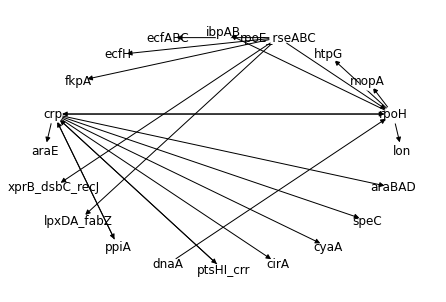

In [192]:
nx.draw_circular(g, with_labels=True, node_color="white")

In [111]:
g.adj

AdjacencyView({'adhE': {}, 'nlpD_rpoS': {'adhE': {}, 'narZYWV': {}, 'katG': {}, 'alkA': {}, 'osmY': {}, 'dps': {}, 'nhaA': {}}, 'narZYWV': {}, 'narL': {'adhE': {}, 'frdABCD': {}, 'dcuB_fumB': {}, 'narGHJI': {}, 'focA_pflB': {}, 'fdnGHI': {}, 'narK': {}}, 'katG': {}, 'alkA': {}, 'frdABCD': {}, 'fnr': {'frdABCD': {}, 'dcuB_fumB': {}, 'ansB': {}, 'tdcABCDEFG': {}, 'aspA': {}, 'narGHJI': {}, 'cyoABCDE': {}, 'focA_pflB': {}, 'fdnGHI': {}, 'narK': {}}, 'dcuB_fumB': {}, 'osmY': {}, 'ansB': {}, 'tdcABCDEFG': {}, 'aspA': {}, 'narGHJI': {}, 'cyoABCDE': {}, 'focA_pflB': {}, 'dps': {}, 'fdnGHI': {}, 'nhaA': {}, 'narK': {}})

In [112]:
g.nodes

NodeView(('adhE', 'nlpD_rpoS', 'narZYWV', 'narL', 'katG', 'alkA', 'frdABCD', 'fnr', 'dcuB_fumB', 'osmY', 'ansB', 'tdcABCDEFG', 'aspA', 'narGHJI', 'cyoABCDE', 'focA_pflB', 'dps', 'fdnGHI', 'nhaA', 'narK'))

In [193]:
Y = nx.adjacency_matrix(g).todense()

In [194]:
X.shape

(100, 20)

In [195]:
Y.shape

(20, 20)

In [196]:
from notears.linear import notears_linear

In [197]:
mat = notears_linear(np.array(X, dtype=np.float), lambda1=0, loss_type='l2')

In [198]:
mat.shape

(20, 20)

In [199]:
mat = (mat != 0).astype(np.int)

In [200]:
mat

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0,

In [201]:
Y

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0,

In [202]:
from baseline_common import compute_metrics

In [203]:
prec, recall, shd = compute_metrics(mat, Y.transpose())
prec, recall, shd

(0.08333333333333333, 0.36363636363636365, 102)

In [204]:
prec, recall, shd = compute_metrics(mat, Y)
prec, recall, shd

(0.07291666666666667, 0.3181818181818182, 104)

In [ ]:
# draw the network

In [140]:
x

,0,1,2,3,4,5,6,7,8,9
0,-1.467719,3.410803,0.301644,1.841416,-0.357911,-0.464067,-0.422286,0.717824,2.501813,0.917540
1,1.228571,-3.361018,-2.078161,-0.162477,-2.370808,-0.628299,1.952434,1.692733,-3.329531,-1.279338
2,-0.105726,-4.655333,-5.624275,-0.926133,-0.571311,1.380266,0.536243,-1.079457,-0.728723,1.806709
3,-0.732111,1.290430,4.100698,-1.740641,-2.556170,0.041560,-1.864843,-0.709877,1.576080,-0.876751
4,-0.893726,0.127030,-0.445743,0.974709,-3.664015,0.268499,-0.896767,-2.819956,1.744045,1.008054
...,...,...,...,...,...,...,...,...,...,...
995,0.168173,-1.791779,-2.842672,-0.221604,0.932999,1.513192,1.689471,3.533341,1.346443,-0.815981
996,-0.587997,4.885264,7.808044,-0.815227,1.187311,-1.296469,-1.501275,-0.426248,3.249485,-0.782879
997,-1.239039,3.125509,2.007983,-0.592581,0.334867,0.774163,-1.429323,-2.553879,1.391263,-0.576443
998,-0.892920,1.471275,1.764997,0.514787,-1.141836,-0.851943,-0.318201,-1.978312,0.255757,0.612336


In [148]:
np.array(x)

array([[-1.46771903,  3.41080291,  0.30164368, ...,  0.71782436,
         2.50181339,  0.91754021],
       [ 1.2285708 , -3.36101846, -2.07816117, ...,  1.69273315,
        -3.3295314 , -1.27933818],
       [-0.10572589, -4.65533324, -5.62427472, ..., -1.07945679,
        -0.7287235 ,  1.8067093 ],
       ...,
       [-1.2390393 ,  3.12550932,  2.00798292, ..., -2.55387905,
         1.39126348, -0.57644252],
       [-0.89291962,  1.47127502,  1.76499721, ..., -1.97831156,
         0.25575685,  0.61233607],
       [-1.64248415,  1.1629223 ,  0.41018736, ..., -0.15028858,
         0.8128461 , -0.92216737]])

In [157]:
np.array(X, dtype=np.float)

array([[ 945.31176174, 2641.30621616, 2048.24829303, ...,  523.78411051,
        2196.18098929,  775.88460451],
       [4993.63936596, 9717.16947203, 3322.42401928, ...,  145.14264032,
        4891.32405643,   52.54661569],
       [2917.27562782, 7916.7730685 , 2659.55504659, ...,  502.77351219,
        3853.06657636,  670.41127235],
       ...,
       [2712.29889502, 5787.80210523, 2343.64426728, ...,  477.90253901,
        3330.12492166,  600.74639446],
       [ 286.53087038,  465.64643791,  462.23619668, ...,  469.54975687,
         388.01827218,  832.40172903],
       [2001.21323071, 4297.98184589, 2860.32987142, ...,  388.05761894,
        3372.99265047,  728.31222469]])

In [152]:
X.dtype

dtype('O')

In [ ]:
# run NOTEARS

mat = (mat != 0).astype(np.int)
# CAUTION here seems that I must do y.transpose()
prec, recall, shd = compute_metrics(mat, y.transpose())
print('prec:', prec, 'recall:', recall, 'shd:', shd)

## testing networkX library

In [31]:
import networkx as nx

In [47]:
g = nx.DiGraph()

In [48]:
g.is_directed()

True

In [49]:
g.add_node("hello")
g.add_node(3)

In [55]:
g.add_edge(3, "hello")

In [56]:
g.add_edge("hello", 3)

In [35]:
import matplotlib.pyplot as plt

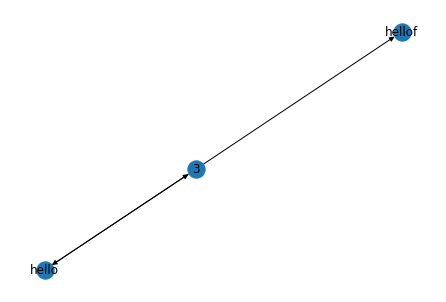

In [70]:
nx.draw(g, pos=nx.spring_layout(g), with_labels=True)

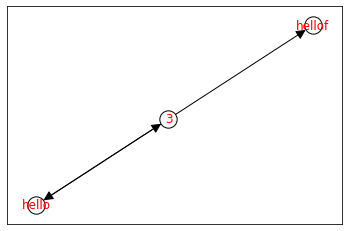

In [88]:
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color='white', edgecolors='black')
nx.draw_networkx_edges(g, pos, arrowsize=20)
# for p in pos:  # raise text positions
#     pos[p][1] += 0.1
nx.draw_networkx_labels(g, pos, font_color='red')
plt.show()

## Run the daemon

In [ ]:
# FIXME no GPU detected
from baseline import run_many, main, table, get_dataset_fname

In [ ]:
from baseline import get_dataset_fname_old, load_results

In [ ]:
main()

In [ ]:
# TODO generate table suitable for view
# TODO save the view
table()

In [ ]:
def pdtable():
    res = load_results()
    # generate csv directly
    # csv.write()
    with open('results/method.csv', 'w') as fp:
        writer = csv.writer(fp)
        # header
        writer.writerow(['model', 'prec', 'recall', 'shd', 'time'])
        for d in [10, 20, 50, 100]:
            # CAUTION fixed "SF" here
            #
            # FIXME reading previous results
            name = get_dataset_fname_old(d, 'SF')
            methods = ['PC', 'GES', 
                       # CAM is a little slow
#                        'CAM',
                       'RCC-CLF', 'RCC-NN',
                       'notears', 'DAG-GNN']
#             if d < 50:
#                 methods += ['RL-BIC']
            for method in methods:
                tmp = res[name][method]
                tmp = ['{:.1f}'.format(tmp[0] * 100),
                       '{:.1f}'.format(tmp[1] * 100),
                       tmp[2],
                       '{:.2f}'.format(tmp[3])]
                # tmp = list(map(lambda x: '{:.3f}'.format(x), tmp))
                tmp = [method] + tmp
                writer.writerow(tmp)
            writer.writerow([])


In [ ]:
result = load_results()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=['method', 'd', 'prec', 'recall', 'shd'])

In [ ]:
row1 = {'method': 'test', 'd': 5, 'prec': 0.3, 'recall': 0.23, 'shd': 23}

In [ ]:
df.append(row1, ignore_index=True)

In [ ]:
df

In [ ]:
df = pd.DataFrame(columns=['method', 'd', 'prec', 'recall', 'shd'])
for d in [10,20,50,100]:
    name_sf = get_dataset_fname_old(d, 'SF')
    name_er = get_dataset_fname_old(d, 'ER')
    for method in ['PC', 'GES', 'RCC-CLF', 'RCC-NN', 'notears', 'DAG-GNN']:
        tmp_sf = result[name_sf][method]
        tmp_er = result[name_er][method]
        df = df.append({'method': method,
                  'd': d,
                  'prec': '{:.1f}'.format((tmp_sf[0] + tmp_er[0]) / 2 * 100),
                  'recall': '{:.1f}'.format((tmp_sf[1] + tmp_er[1]) / 2 * 100),
                  'shd': '{:.2f}'.format((tmp_sf[2] + tmp_er[2]) / 2)},
                      ignore_index=True)
df

In [ ]:
result

# Playground

## Disabling cuda

My intention is to globally set whether to use cuda or not. The code has xxxtensor.cuda(), so that I can globally turn on cuda without changing the code. The motivation is that DAG-GNN has its layer creating CPU tensors, and that would throw error when computing with CUDA tensors. I can disable .cuda() semantics to be compatible with DAG-GNN's code without modifying it.

UPDATE: I still need to check `torch.cuda.is_available()` before calling `tensor.cuda()`, otherwise exception is thrown. I'm not using this, and instead disabled `.cuda()` calls by `use_cuda` variable in `baseline_daggnn.py`

In [ ]:
import torch, os

In [ ]:
# This must be run before any torch API calls
os.putenv('CUDA_VISIBLE_DEVICES', '')

In [ ]:
os.getenv('CUDA_VISIBLE_DEVICES')

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.current_device()

In [ ]:
torch.cuda.device(None)

In [ ]:
torch.cuda.device_count()

## Testing pygobnilp

In [ ]:
!export HTTPS_PROXY="http://172.18.0.1:8889"

In [ ]:
!pip install pygobnilp

In [ ]:
from pygobnilp.gobnilp import Gobnilp
m = Gobnilp()

In [ ]:
m.learn('/home/jovyan/data/gaussian.dat',data_type='continuous',score='BGe')

In [ ]:
m.learn('discrete.dat')